In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
801,2262,120,RL,35.0,5118,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
894,2355,20,RL,63.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
1374,2835,20,RL,78.0,9316,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
1071,2532,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1087,2548,90,RL,NaN,9555,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal


*test- Contains 80 columns (final price column) is to be predicted and then submitted.*

**First Submission** Using the mean value.

In [ ]:
first_sub = test_df[::]

In [ ]:
train_df.SalePrice.mean()

In [ ]:
first_sub['SalePrice'] = train_df.SalePrice.mean()

In [ ]:
first_sub.sample(5)

In [ ]:
first_sub[['Id', 'SalePrice']]

In [ ]:
first_sub[['Id', 'SalePrice']].to_csv('SalePrice prediction using Average.csv', index=False)

**Getting a score of 4K on leaderboard**

## Creating a Machine Model -> *Trying for above the Average score*

In [8]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train_df[['Condition1', 'Condition2', 'YearBuilt','LotArea']].sample(10)

,Condition1,Condition2,YearBuilt,LotArea
512,Feedr,Norm,1958,9100
817,Norm,Norm,2002,13265
494,Artery,Norm,1938,5784
985,Norm,Norm,1950,10880
620,Norm,Norm,1914,8248
1391,Norm,Norm,1967,8944
1374,Norm,Norm,2005,10625
1378,Norm,Norm,1973,1953
120,Norm,Norm,1969,21453
702,Norm,Norm,2006,12438


*We can use multiple columns, Trying to built ml model using **YearBuilt and LotArea** .* 

In [12]:
from copy import deepcopy
train_df_sub = deepcopy(train_df[['YearBuilt', 'LotArea', 'SalePrice']])

In [13]:
train_df_sub

,YearBuilt,LotArea,SalePrice
0,2003,8450,208500
1,1976,9600,181500
2,2001,11250,223500
3,1915,9550,140000
4,2000,14260,250000
...,...,...,...
1455,1999,7917,175000
1456,1978,13175,210000
1457,1941,9042,266500
1458,1950,9717,142125


In [15]:
x_train = train_df_sub.to_numpy()[:, :-1] #only features, not the last column/target
x_train

array([[ 2003,  8450],
       [ 1976,  9600],
       [ 2001, 11250],
       ...,
       [ 1941,  9042],
       [ 1950,  9717],
       [ 1965,  9937]])

In [16]:
y_train = train_df_sub.to_numpy()[:, -1]
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

lr

LinearRegression()

In [19]:
train_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   YearBuilt  1460 non-null   int64
 1   LotArea    1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


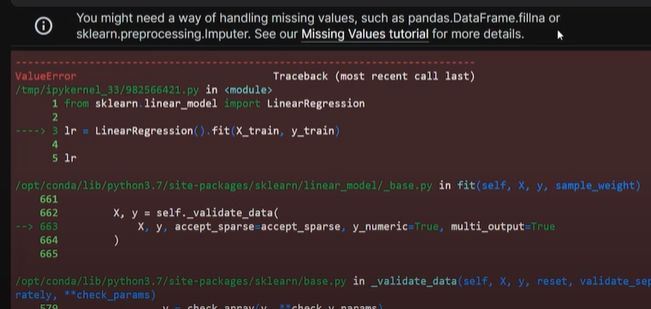

*If the training data contains missing value the above error may occur*

Common way to get over missing value is to remove the whole row itself, but during **test** we neeed to predict the output for every row. Hence in Kaggle competition it is better to use other methods. 

**Using mean imputation for filling the missing values. NOT IDEAL *but better than dropping* .**


train_df_sub = train_df_sub **.fillna(train_df.sub.mean())**

Each column will be filled with the mean of that particular column's value.

In [20]:
lr.coef_ 

array([1365.77615312,    2.04117215])

In [21]:
lr.intercept_

-2532856.0245703217

In [22]:
train_df_sub.iloc[1]

YearBuilt      1976
LotArea        9600
SalePrice    181500
Name: 1, dtype: int64

In [24]:
predicted_val = lr.intercept_ + 1976*lr.coef_[0] + 9600*lr.coef_[1]
predicted_val

185512.90663024408

In [25]:
train_df_sub.iloc[1,-1] - predicted_val

-4012.906630244077

In [29]:
from sklearn.metrics import mean_absolute_error
#Kaggle for this project is using root mean square, we can use tht here as well to 
#know how well our model is performing


In [26]:
train_df_sub['linearPrediction'] = lr.predict(x_train)

In [27]:
train_df_sub

,YearBuilt,LotArea,SalePrice,linearPrediction
0,2003,8450,208500,220041.514794
1,1976,9600,181500,185512.906630
2,2001,11250,223500,223025.244504
3,1915,9550,140000,102098.502682
4,2000,14260,250000,227803.396518
...,...,...,...,...
1455,1999,7917,175000,213490.465426
1456,1978,13175,210000,195541.649368
1457,1941,9042,266500,136571.767212
1458,1950,9717,142125,150241.543790


In [30]:
mean_absolute_error(train_df_sub['SalePrice'], train_df_sub['linearPrediction'])

44431.44657146369

*On average, the model is **OFF BY 44,000** NOT GOOD !!*

#### SECOND SUBMISSION, Using linear Regression

In [31]:
test_df_sub = deepcopy(test_df[['YearBuilt', 'LotArea']])
test_df_sub

,YearBuilt,LotArea
0,1961,11622
1,1958,14267
2,1997,13830
3,1998,9978
4,1992,5005
...,...,...
1454,1970,1936
1455,1970,1894
1456,1960,20000
1457,1992,10441


Check if there exist missing Value

In [32]:
test_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   YearBuilt  1459 non-null   int64
 1   LotArea    1459 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


**No missing values, still an appropriate fillna must be utilized during competitions**

In [33]:
x_test = test_df_sub.to_numpy()
x_test

array([[ 1961, 11622],
       [ 1958, 14267],
       [ 1997, 13830],
       ...,
       [ 1960, 20000],
       [ 1992, 10441],
       [ 1993,  9627]])

In [34]:
test_df['LinearPrediction'] = lr.predict(x_test)
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LinearPrediction
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169153.514418
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,170455.086292
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,222828.364034
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,216331.545071
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,197986.139057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,161674.706365
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,161588.977134
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,184888.678526
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,209081.950857


In [35]:
test_df[['Id', "LinearPrediction"]]

,Id,LinearPrediction
0,1461,169153.514418
1,1462,170455.086292
2,1463,222828.364034
3,1464,216331.545071
4,1465,197986.139057
...,...,...
1454,2915,161674.706365
1455,2916,161588.977134
1456,2917,184888.678526
1457,2918,209081.950857


Column name must be SalePrice in CSV File that is to be submitted.

In [36]:
test_df = test_df.rename(columns = {'LinearPrediction':'SalePrice'})

In [37]:
test_df[['Id','SalePrice']]

,Id,SalePrice
0,1461,169153.514418
1,1462,170455.086292
2,1463,222828.364034
3,1464,216331.545071
4,1465,197986.139057
...,...,...
1454,2915,161674.706365
1455,2916,161588.977134
1456,2917,184888.678526
1457,2918,209081.950857


In [39]:
test_df[['Id', 'SalePrice']].to_csv('Linear_Prediction_01.csv', index=False)

SUBMISSION, 
Lower Score -> in Kaggle implies less error, Better position

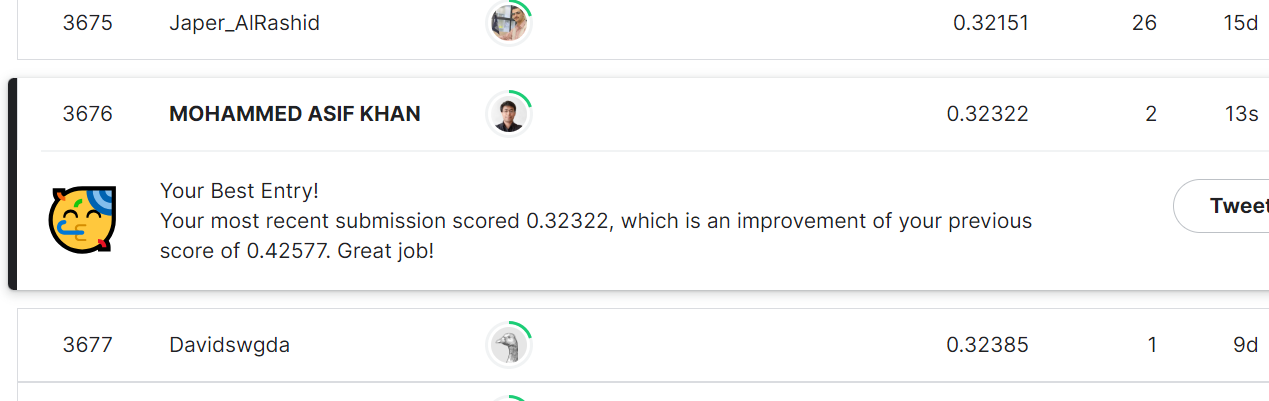

In [6]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
type(train_df.isnull().sum(axis=1))


pandas.core.series.Series

In [29]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [30]:
columns_with_nans = train_df.columns[train_df.isnull().sum() > 1]

# Print details of columns with more than 1 NaN value
for column in columns_with_nans:
    print(f"Column: {column}")
    print(f"Number of NaN values: {train_df[column].isnull().sum()}")

Column: LotFrontage
Number of NaN values: 259
Column: Alley
Number of NaN values: 1369
Column: MasVnrType
Number of NaN values: 872
Column: MasVnrArea
Number of NaN values: 8
Column: BsmtQual
Number of NaN values: 37
Column: BsmtCond
Number of NaN values: 37
Column: BsmtExposure
Number of NaN values: 38
Column: BsmtFinType1
Number of NaN values: 37
Column: BsmtFinType2
Number of NaN values: 38
Column: FireplaceQu
Number of NaN values: 690
Column: GarageType
Number of NaN values: 81
Column: GarageYrBlt
Number of NaN values: 81
Column: GarageFinish
Number of NaN values: 81
Column: GarageQual
Number of NaN values: 81
Column: GarageCond
Number of NaN values: 81
Column: PoolQC
Number of NaN values: 1453
Column: Fence
Number of NaN values: 1179
Column: MiscFeature
Number of NaN values: 1406


In [35]:
train_df[train_df.isnull().all(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
